In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bankdata= pd.read_csv('Bank_Personal_Loan_Modelling.csv') #loading the data

In [3]:
bankdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
bankdata.describe() #statical summary

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
bankdata.shape #shape

(5000, 14)

In [7]:
bankdata.isna()
# Any null values present in the data.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
pd.DataFrame( bankdata.isnull().sum(), columns= ['Number of missing values']) #Any missing values.

,Number of missing values
ID,0
Age,0
Experience,0
Income,0
ZIP Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal Loan,0


In [9]:
bankdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [10]:
#There are no missing values, but Experience column has negative values. Assuming it as incorrect imputation replacing those values.

bankdata['Experience']=bankdata['Experience'].abs()
bankdata

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


CCAvg, Mortgage, personalloan, securities acc, cda account, online, credit card have zero values, but they are defined such a way with either 0 or 1. so no need to fill those values.

# 2.EDA: Study the data distribution in each attribute and target variable

In [11]:
#Finding number of unique values of each column
bankdata.nunique().sort_values()

Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
Education                3
Family                   4
Experience              44
Age                     45
CCAvg                  108
Income                 162
Mortgage               347
ZIP Code               467
ID                    5000
dtype: int64

In [12]:
#Renaming the column Ids to remove space.

bankdata.rename(columns = {'Personal Loan':'PersonalLoan', 'Securities Account':'SecuritiesAccount', 
                              'CD Account':'CDAccount', 'ZIP Code':'ZIPCode'}, inplace = True) 

In [13]:
# Number of people with zero mortgage
bankdata.Mortgage[bankdata['Mortgage']==0].value_counts()

0    3462
Name: Mortgage, dtype: int64

In [14]:
#Number of people with zero credit card spending per month
bankdata.CCAvg[bankdata['CCAvg']==0].value_counts()

0.0    106
Name: CCAvg, dtype: int64

In [15]:
#Finding the categorical columns to get value counts of them
categorical_columns=[col for col in bankdata.columns if bankdata[col].nunique()<=5]
print(categorical_columns)
countable_columns =[col for col in bankdata.columns if bankdata[col].nunique()>5]
print(countable_columns)

['Family', 'Education', 'PersonalLoan', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard']
['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'CCAvg', 'Mortgage']


In [16]:
# value counts of categorical columns
for col in categorical_columns:
    print(bankdata[col].value_counts())
    print('\n')

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


1    2096
3    1501
2    1403
Name: Education, dtype: int64


0    4520
1     480
Name: PersonalLoan, dtype: int64


0    4478
1     522
Name: SecuritiesAccount, dtype: int64


0    4698
1     302
Name: CDAccount, dtype: int64


1    2984
0    2016
Name: Online, dtype: int64


0    3530
1    1470
Name: CreditCard, dtype: int64




# Univariate 

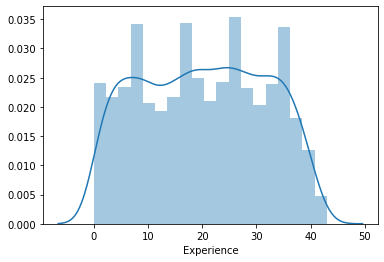

In [17]:
sns.distplot(bankdata.Experience)

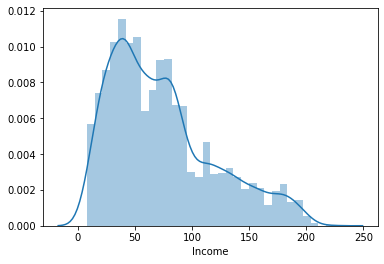

In [18]:
sns.distplot(bankdata.Income)

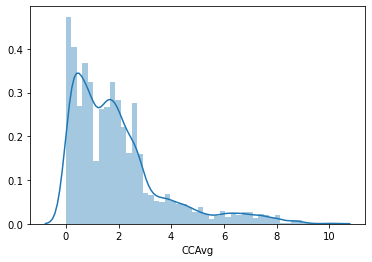

In [19]:
sns.distplot(bankdata.CCAvg)

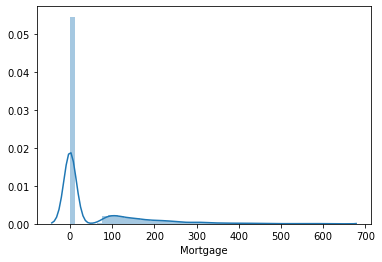

In [20]:
sns.distplot(bankdata.Mortgage)

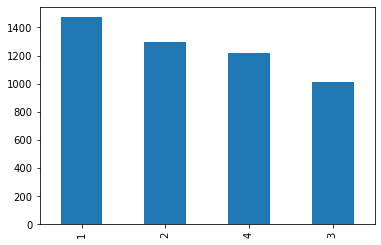

In [21]:
bankdata.Family.value_counts().plot.bar()


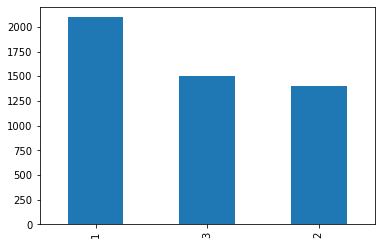

In [22]:
bankdata.Education.value_counts().plot.bar()


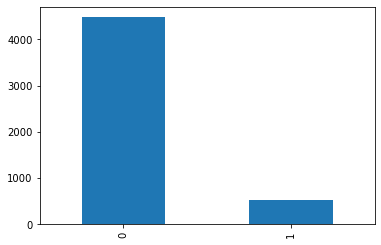

In [23]:
bankdata.SecuritiesAccount.value_counts().plot.bar()


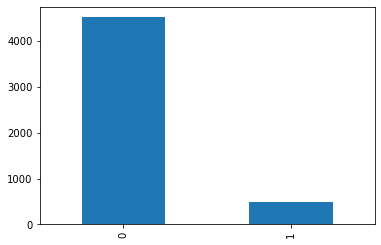

In [24]:
bankdata.PersonalLoan.value_counts().plot.bar()

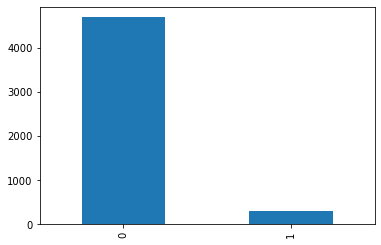

In [25]:
bankdata.CDAccount.value_counts().plot.bar()


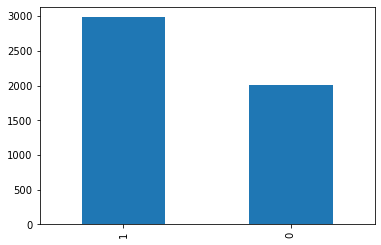

In [26]:
bankdata.Online.value_counts().plot.bar()


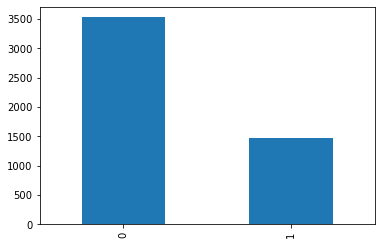

In [27]:
bankdata.CreditCard.value_counts().plot.bar()


**insights of univariate analysis. **

Most of the customer doesn't have Securities Account, CD Account and CreditCard
More number of customer use internet banking facilities.
More number of customer have family of 1.

# Bivariate 

In [28]:
bankdata.isnull().values.any() # If there are any null values in data set

False

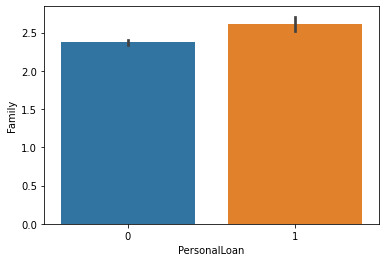

In [29]:
sns.barplot(y=bankdata['Family'],x=bankdata['PersonalLoan'])

** insights**
FAmily with more than 2 took more personal loan.

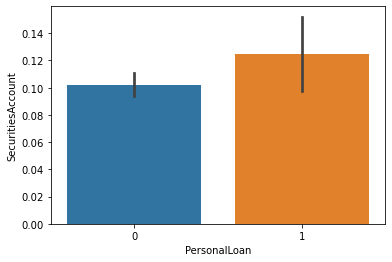

In [30]:
sns.barplot(y=bankdata['SecuritiesAccount'],x=bankdata['PersonalLoan'])

** insights**
customers with securities account took slightly more personal loan

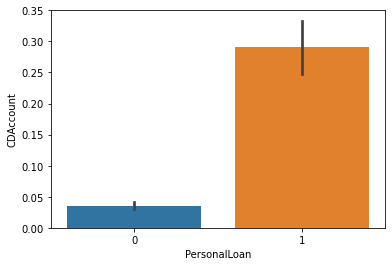

In [31]:
sns.barplot(y='CDAccount', x='PersonalLoan', data=bankdata)

** insights**
Customers with CDA Account has taken more personal loan.

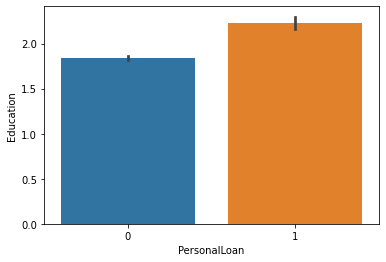

In [32]:
sns.barplot(y=bankdata['Education'],x=bankdata['PersonalLoan'])


customers with undergrad have taken less personal loans compared to with Advanced/Professional

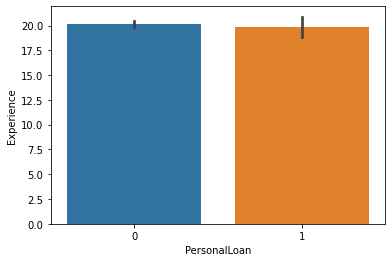

In [33]:
sns.barplot(y=bankdata['Experience'],x=bankdata['PersonalLoan'])

**insights**
customers with more experience have a slight chance of not taking personal loan

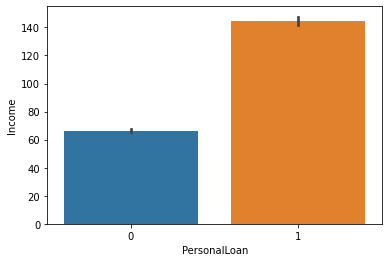

In [34]:
sns.barplot(y=bankdata['Income'],x=bankdata['PersonalLoan'])

**insights**

More number of customers with high income have taken personal Loan.

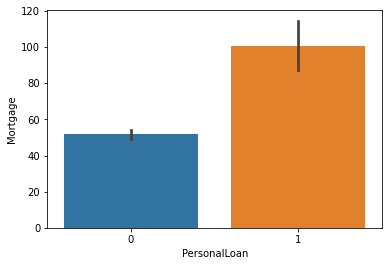

In [35]:
sns.barplot(y=bankdata['Mortgage'],x=bankdata['PersonalLoan'])

**insights**
Customers with high mortgage have opted for the personal loan

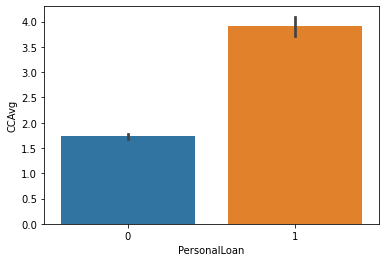

In [36]:
sns.barplot(y=bankdata['CCAvg'],x=bankdata['PersonalLoan'])

**insights**
Customers with high CCAvg have opted for the personal loan

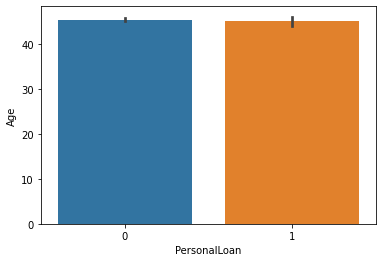

In [37]:
sns.barplot(y=bankdata['Age'],x=bankdata['PersonalLoan'])

**insights**
Age doesnt have much effect on whether customers take personal loan.

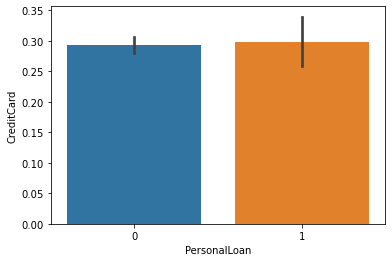

In [38]:
sns.barplot(y=bankdata['CreditCard'],x=bankdata['PersonalLoan'])

**insights**
credit card hasnt has much effect in taking personal loan

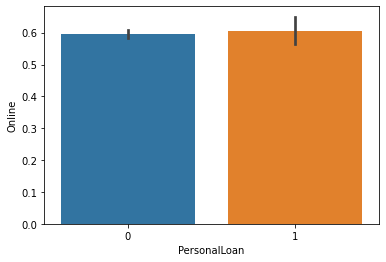

In [39]:
sns.barplot(y=bankdata['Online'],x=bankdata['PersonalLoan'])

**insights**
credit card hasnt has much effect in taking personal loan

# getting model ready.

In [40]:
bivariatedata = bankdata

In [41]:
bivariatedata.groupby(['PersonalLoan']).mean()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
PersonalLoan,,,,,,,,,,,,,
0,2512.165487,45.367257,20.165487,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [42]:
bivariatedata.groupby(['PersonalLoan']).median()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
PersonalLoan,,,,,,,,,,,,,
0,2518.5,45.0,20.0,59.0,93437.0,2.0,1.4,2.0,0.0,0.0,0.0,1.0,0.0
1,2342.0,45.0,20.0,142.5,93407.0,3.0,3.8,2.0,0.0,0.0,0.0,1.0,0.0


**Insights:**
No change in personal loan w.r.t Experience, Education, Mortgage, Sec Account, CDA Acc, online and credit card.
Income and CCAvg is higher for ppl who took Personal loan

Since ZIP Code doesn't show any effect on the chances of Personal Loan it is better to remove it form our data


In [43]:
pd.crosstab(bivariatedata['Income'],bivariatedata['PersonalLoan'],normalize='columns')

PersonalLoan,0,1
Income,,
8,0.005088,0.000000
9,0.005752,0.000000
10,0.005088,0.000000
11,0.005973,0.000000
12,0.006637,0.000000
...,...,...
203,0.000221,0.002083
204,0.000664,0.000000
205,0.000442,0.000000


In [44]:
pd.crosstab(bivariatedata['CCAvg'],bivariatedata['PersonalLoan'],normalize='columns')

PersonalLoan,0,1
CCAvg,,
0.0,0.023230,0.002083
0.1,0.040044,0.004167
0.2,0.043363,0.016667
0.3,0.051991,0.012500
0.4,0.038717,0.008333
...,...,...
8.8,0.001770,0.002083
8.9,0.000000,0.002083
9.0,0.000000,0.004167


In [45]:
pd.crosstab(bivariatedata['Online'],bivariatedata['PersonalLoan'],normalize='index')

PersonalLoan,0,1
Online,,
0,0.90625,0.09375
1,0.90248,0.09752


In [46]:
pd.crosstab(bivariatedata['CreditCard'],bivariatedata['PersonalLoan'],normalize='index')

PersonalLoan,0,1
CreditCard,,
0,0.904533,0.095467
1,0.902721,0.097279


In [47]:
pd.crosstab(bivariatedata['Education'],bivariatedata['PersonalLoan'],normalize='index')

PersonalLoan,0,1
Education,,
1,0.955630,0.044370
2,0.870278,0.129722
3,0.863424,0.136576


In [48]:
pd.crosstab(bivariatedata['Experience'],bivariatedata['PersonalLoan'],normalize='index')

PersonalLoan,0,1
Experience,,
0,0.893939,0.106061
1,0.925234,0.074766
2,0.910000,0.090000
3,0.872180,0.127820
4,0.920354,0.079646
5,0.904110,0.095890
6,0.899160,0.100840
7,0.900826,0.099174
8,0.848739,0.151261


In [49]:
pd.crosstab(bivariatedata['Mortgage'],bivariatedata['PersonalLoan'],normalize='index')

PersonalLoan,0,1
Mortgage,,
0,0.909879,0.090121
75,0.875000,0.125000
76,0.916667,0.083333
77,1.000000,0.000000
78,1.000000,0.000000
...,...,...
590,0.000000,1.000000
601,1.000000,0.000000
612,0.000000,1.000000


In [50]:
pd.crosstab(bivariatedata['Income'],bivariatedata['PersonalLoan'], normalize = 'columns')

PersonalLoan,0,1
Income,,
8,0.005088,0.000000
9,0.005752,0.000000
10,0.005088,0.000000
11,0.005973,0.000000
12,0.006637,0.000000
...,...,...
203,0.000221,0.002083
204,0.000664,0.000000
205,0.000442,0.000000


In [51]:
pd.crosstab(bivariatedata['Family'],bivariatedata['PersonalLoan'],normalize='columns')

PersonalLoan,0,1
Family,,
1,0.301991,0.222917
2,0.263274,0.220833
3,0.194027,0.277083
4,0.240708,0.279167


In [52]:
pd.crosstab(bivariatedata['Age'],bivariatedata['PersonalLoan'],normalize='columns')

PersonalLoan,0,1
Age,,
23,0.002655,0.000000
24,0.006195,0.000000
25,0.011726,0.000000
26,0.014381,0.027083
27,0.017478,0.025000
28,0.020796,0.018750
29,0.023894,0.031250
30,0.026327,0.035417
31,0.026106,0.014583


**insights**
After looking at the mean, median, crosstab and bivariate analysis. It comes to that

Experience,credit card, Online has not much change w.r.t Personal Loan. We can drop those columns.

A week relation w.r.t Age,Family
And Perosnal Loan variable is dependent on CDAAccount, Income, Mortgage,Education, SecuritiesAccount,CCAvg. So these are dependents.

In [53]:
bankdata

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [54]:
bankdata = bankdata.drop(['Experience','ZIPCode','CreditCard','Online'], axis =1 )
bankdata

,ID,Age,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount
0,1,25,49,4,1.6,1,0,0,1,0
1,2,45,34,3,1.5,1,0,0,1,0
2,3,39,11,1,1.0,1,0,0,0,0
3,4,35,100,1,2.7,2,0,0,0,0
4,5,35,45,4,1.0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,40,1,1.9,3,0,0,0,0
4996,4997,30,15,4,0.4,1,85,0,0,0
4997,4998,63,24,2,0.3,3,0,0,0,0
4998,4999,65,49,3,0.5,2,0,0,0,0


Split the data into training and test set in the ratio of 70:30 

In [55]:
from sklearn.model_selection import train_test_split

X = bankdata.drop(['PersonalLoan'],axis=1)
Y = bankdata['PersonalLoan']   

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

x_train.head()

,ID,Age,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount
1334,1335,47,35,2,1.3,1,0,0,0
4768,4769,38,39,1,2.0,2,0,0,0
65,66,59,131,1,3.8,1,0,0,0
177,178,29,65,4,1.8,2,244,0,0
4489,4490,39,21,3,0.2,2,0,0,0


In [56]:
#Checking if data is in 70:30

print("{0:0.2f}% data is in training set".format((len(x_train)/len(bankdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(bankdata.index)) * 100))

70.00% data is in training set
30.00% data is in test set


# Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score)

In [57]:
import sklearn.metrics as metrics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_prob =model.predict_proba(x_test)
y_predict = model.predict(x_test)


#f1_score
model_score=f1_score(y_test,y_predict)
print("f1 score is",model_score)

#Accuracy
model_accuracy=accuracy_score(y_test,y_predict)
print("Accuracy is",model_accuracy)

#recall_score
recall = recall_score(y_test,y_predict)
print("Recall score is ",recall)

#roc_auc_score
roc_auc_ = roc_auc_score(y_test, y_prob[:,1])
print('roc_auc_score',roc_auc_)

#precision
precision = precision_score(y_test,y_predict)
print("Precision is", precision)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

f1 score is 0.5922746781115878
Accuracy is 0.9366666666666666
Recall score is  0.46308724832214765
roc_auc_score 0.9467905950849234
Precision is 0.8214285714285714
          0         1         2        3         4         5         6  \
0 -0.000143 -0.027166  0.036946  0.41165  0.106249  0.984594  0.000469   

          7         8  intercept  
0 -1.066327  2.011812  -7.802999  


In [58]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1351
           1       0.82      0.46      0.59       149

    accuracy                           0.94      1500
   macro avg       0.88      0.73      0.78      1500
weighted avg       0.93      0.94      0.93      1500



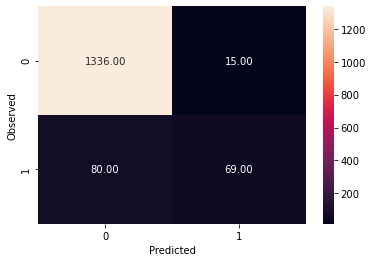

In [59]:
    cm = confusion_matrix( y_test, y_predict)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

###### **insights**

*True Positive (observed=1,predicted=1):*

Predicted that Personal loan will be taken and customers took the Personal loan is 69.

*False Positive (observed=0,predicted=1):*

Predicted that customers might not taken personal loan, but taken 15

*True Negative (observed=0,predicted=0):*

Predicted that customers wont take personal Loan and didnt take loan is 1336.0

*False Negative (observed=1,predicted=0):*

Predicted that customers take personal loan, but didnot take is 80.00

In [60]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = x_train.columns
fi['Coeff'] = np.round(abs(model.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
8,CDAccount,2.01
7,SecuritiesAccount,1.07
5,Education,0.98
3,Family,0.41
4,CCAvg,0.11
2,Income,0.04
1,Age,0.03
0,ID,0.00
6,Mortgage,0.00


In [61]:
x_test[y_test!=y_predict]
# For test data showing all the rows where the predicted class is not equal to the observed class.

,ID,Age,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount
4377,4378,33,145,1,2.7,3,0,0,0
3988,3989,59,85,1,3.4,3,0,0,1
3271,3272,52,93,4,4.1,2,0,0,0
349,350,26,60,2,3.0,1,132,0,0
927,928,65,95,3,3.7,2,138,0,0
...,...,...,...,...,...,...,...,...,...
1793,1794,35,113,3,0.8,3,0,0,0
813,814,50,130,1,1.1,2,0,0,0
3766,3767,59,108,4,3.8,2,304,0,0
421,422,28,115,4,3.1,2,0,0,0


# Business Insights


Experience,credit card, Online has not much change w.r.t Personal Loan. These festures doesnt help model in predicting target variable

A week relation w.r.t Age,Family

CDAAccount, Income, Mortgage,Education, SecuritiesAccount,CCAvg seems to be top 6 features which influence the model's output. So these are dependents.

variable ID does not give any information associated with customer and Personal loan . and does not provide any conclusion for future potential loan customers.

True Positive value is lesser than the true negative value here.

*True Positive (observed=1,predicted=1):*

Predicted that Personal loan will be taken and customers took the Personal loan is 69.

*False Positive (observed=0,predicted=1):*

Predicted that customers might not taken personal loan, but 15 customers took personal loan.

*True Negative (observed=0,predicted=0):*

Predicted that customers wont take personal Loan and didnt take loan is 1336.0

*False Negative (observed=1,predicted=0):*

Predicted that customers take personal loan, but didnot take is 80.00


 overall predicted accuracy of the model (Accuracy )is 94%.
Precision is 87%
